In [214]:
# importing required packages
import pandas as pd
import numpy as np
import sqlite3 as sql
import pickle

reading the all csv files as dataframe and concat it as a single dataframe 

In [84]:
df1=pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\project\flat price\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [85]:
df2=pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\project\flat price\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df2.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [86]:
df3=pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\project\flat price\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df3.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [87]:
df4=pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\project\flat price\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df4.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [88]:
df5=pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\project\flat price\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df5.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [89]:
df6=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
df6

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1069111,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
1069112,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
1069113,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
1069114,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


data cleaning 

In [90]:
df6.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [91]:
del(df6["remaining_lease"])

In [92]:
(df6["town"].unique())

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN',
       'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS',
       'YISHUN', 'SEMBAWANG', 'PUNGGOL', 'LIM CHU KANG'], dtype=object)

ENCODING THE COLOUMNS BY LABEL ENCODING

In [93]:
from sklearn import preprocessing
encode=preprocessing.LabelEncoder()
df6["town_code"]=encode.fit_transform(df6["town"])
df6["flat_type_code"]=encode.fit_transform(df6["flat_type"])
df6["flat_model_code"]=encode.fit_transform(df6["flat_model"])
df6["storey_range_code"]=encode.fit_transform(df6["storey_range"])


In [94]:
df6[["town","town_code"]]

,town,town_code
0,ANG MO KIO,0
1,ANG MO KIO,0
2,ANG MO KIO,0
3,ANG MO KIO,0
4,ANG MO KIO,0
...,...,...
1069111,YISHUN,26
1069112,YISHUN,26
1069113,YISHUN,26
1069114,YISHUN,26


In [95]:
df6

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,town_code,flat_type_code,flat_model_code,storey_range_code
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,0,2,9,4
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,0,2,9,2
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,0,2,21,4
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,0,2,21,4
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,0,2,21,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069111,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,26,4,9,5
1069112,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,26,5,15,5
1069113,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,26,5,5,4
1069114,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,26,5,15,4


SPLITING THE MONTH COLOUMN AS SELLING_YEAR AND SELLING_MONTH

In [96]:

df6[['Selling_Year','Selling_Month']]=df6.month.str.split("-",expand=True)

In [97]:
df6.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,town_code,flat_type_code,flat_model_code,storey_range_code,Selling_Year,Selling_Month
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,0,2,9,4,2000,01
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,0,2,9,2,2000,01


In [98]:
df7=df6[["block","floor_area_sqm","lease_commence_date","resale_price","town_code","flat_type_code","flat_model_code","storey_range_code","Selling_Year","Selling_Month"]]
df7

,block,floor_area_sqm,lease_commence_date,resale_price,town_code,flat_type_code,flat_model_code,storey_range_code,Selling_Year,Selling_Month
0,170,69.0,1986,147000.0,0,2,9,4,2000,01
1,174,61.0,1986,144000.0,0,2,9,2,2000,01
2,216,73.0,1976,159000.0,0,2,21,4,2000,01
3,215,73.0,1976,167000.0,0,2,21,4,2000,01
4,218,67.0,1976,163000.0,0,2,21,4,2000,01
...,...,...,...,...,...,...,...,...,...,...
1069111,816,122.0,1988,580000.0,26,4,9,5,2014,12
1069112,325,146.0,1988,540000.0,26,5,15,5,2014,12
1069113,618,164.0,1992,738000.0,26,5,5,4,2014,12
1069114,277,152.0,1985,592000.0,26,5,15,4,2014,12


In [99]:
df7.dtypes

block                   object
floor_area_sqm         float64
lease_commence_date      int64
resale_price           float64
town_code                int32
flat_type_code           int32
flat_model_code          int32
storey_range_code        int32
Selling_Year            object
Selling_Month           object
dtype: object

In [100]:
df7["block"].unique()

array(['170', '174', '216', ..., '460C', '240A', '226E'], dtype=object)

In [101]:
df7['block'] = df7['block'].str.replace("[^0-9]", "", regex=True)
df7["Selling_Year"]=df7['Selling_Year'].str.replace("[^0-9]", "", regex=True)
df7["Selling_Month"]=df7['Selling_Month'].str.replace("[^0-9]", "", regex=True)


C:\Users\krish\AppData\Local\Temp\ipykernel_28744\1930093289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['block'] = df7['block'].str.replace("[^0-9]", "", regex=True)
C:\Users\krish\AppData\Local\Temp\ipykernel_28744\1930093289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7["Selling_Year"]=df7['Selling_Year'].str.replace("[^0-9]", "", regex=True)
C:\Users\krish\AppData\Local\Temp\ipykernel_28744\1930093289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [102]:

df7[['Selling_Year', 'Selling_Month','block']] = df7[['Selling_Year', 'Selling_Month','block']].astype(int)

C:\Users\krish\AppData\Local\Temp\ipykernel_28744\4112669556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7[['Selling_Year', 'Selling_Month','block']] = df7[['Selling_Year', 'Selling_Month','block']].astype(int)


In [103]:
df7.dtypes

block                    int32
floor_area_sqm         float64
lease_commence_date      int64
resale_price           float64
town_code                int32
flat_type_code           int32
flat_model_code          int32
storey_range_code        int32
Selling_Year             int32
Selling_Month            int32
dtype: object

In [104]:
for i in df7.columns:
    iqr=df7[i].quantile(0.75)-df7[i].quantile(0.25)
    up=df7[i].quantile(0.75)+(1.5*iqr)
    low=df7[i].quantile(0.75)-(1.5*iqr)
    df7[i]=df7[i].clip(low,up)

C:\Users\krish\AppData\Local\Temp\ipykernel_28744\481960439.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7[i]=df7[i].clip(low,up)
C:\Users\krish\AppData\Local\Temp\ipykernel_28744\481960439.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7[i]=df7[i].clip(low,up)
C:\Users\krish\AppData\Local\Temp\ipykernel_28744\481960439.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [105]:
df7=df7[["block","floor_area_sqm","lease_commence_date","town_code","flat_type_code","flat_model_code","storey_range_code","Selling_Year","Selling_Month","resale_price"]]
df7.head()

,block,floor_area_sqm,lease_commence_date,town_code,flat_type_code,flat_model_code,storey_range_code,Selling_Year,Selling_Month,resale_price
0,170,69.0,1986,0,2,9,4.0,2000,1,147000.0
1,174,61.0,1986,0,2,9,2.0,2000,1,144000.0
2,216,73.0,1976,0,2,21,4.0,2000,1,159000.0
3,215,73.0,1976,0,2,21,4.0,2000,1,167000.0
4,218,67.0,1976,0,2,21,4.0,2000,1,163000.0


eda  by using the corr


<Axes: >

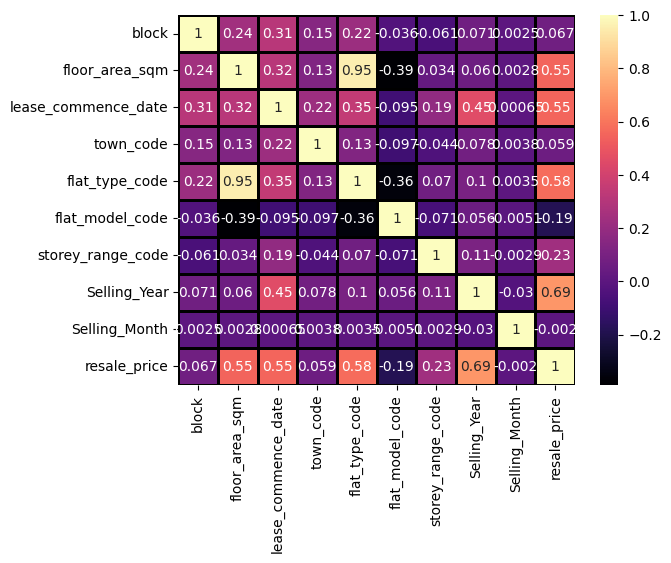

In [106]:
import seaborn as sns
lis=df7.columns
lis
corr_df = df7[lis].corr()

sns.heatmap(corr_df, annot = True,cmap ='magma', linecolor ='black', linewidths = 1)

In [107]:
import numpy as np

df7['log_flat_model_code'] = np.log(df7['flat_model_code'])
df7['sqrt_flat_model_code'] = np.sqrt(df7['flat_model_code'])

C:\Users\krish\AppData\Local\Temp\ipykernel_28744\2850882040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['log_flat_model_code'] = np.log(df7['flat_model_code'])
C:\Users\krish\AppData\Local\Temp\ipykernel_28744\2850882040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['sqrt_flat_model_code'] = np.sqrt(df7['flat_model_code'])


<Axes: >

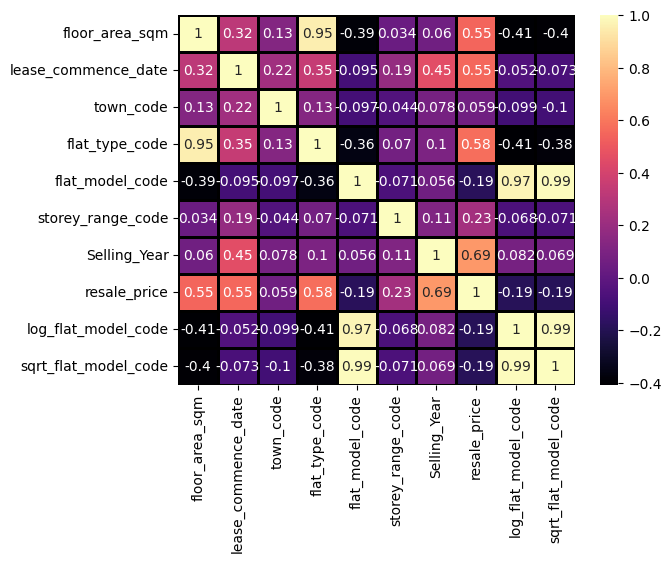

In [110]:
import seaborn as sns
lis=df7.columns
lis
corr_df = df7[lis].corr()

sns.heatmap(corr_df, annot = True,cmap ='magma', linecolor ='black', linewidths = 1)

In [109]:
# by the heat map the unwanted columns are (selling_month)
del(df7["Selling_Month"],df6["Selling_Month"])
# the block is seems like the house no or flat no by that no we can not predict the resale price so we del the col
del(df6["block"],df7["block"])

flat_model_code
3     457271.810463
4     533414.297816
5     552317.049643
6     715517.480517
7     231212.539388
8     316781.818182
9     399875.333609
10    574836.846154
11    425712.512321
12    238315.537716
13    354397.112016
14    453941.175627
15    586545.458801
16    391965.612068
17    578397.198872
18    313900.412422
19    634455.430267
20    164100.897412
21    281240.722727
22    650833.333333
23    480049.971503
24    809660.194175
25    618267.224490
26    181578.010921
27    186239.805353
28    286045.866983
29    314649.743092
30    346376.218623
31    634060.853565
32    809778.151261
33    810000.000000
Name: resale_price, dtype: float64


<Axes: xlabel='flat_model_code'>

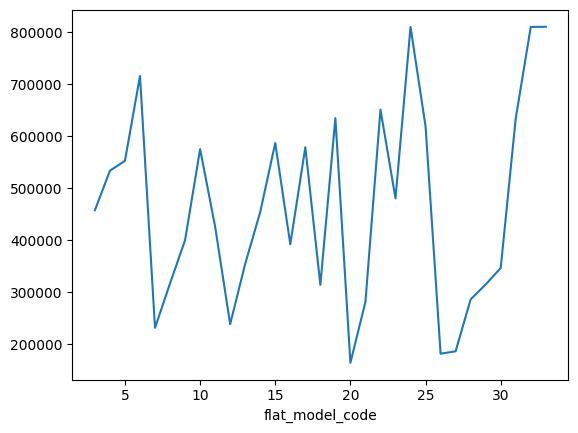

In [111]:
print(df7.groupby("flat_model_code")["resale_price"].mean())
df7.groupby("flat_model_code")["resale_price"].mean().plot()

In [112]:
df7.columns

Index(['floor_area_sqm', 'lease_commence_date', 'town_code', 'flat_type_code',
       'flat_model_code', 'storey_range_code', 'Selling_Year', 'resale_price',
       'log_flat_model_code', 'sqrt_flat_model_code'],
      dtype='object')

In [114]:
# after the transformation also there is no change in corr so we delting the transformed coloumns
del df7["log_flat_model_code"]
del df7["sqrt_flat_model_code"]


by eda the important features are floor_area_sqm,lease_commence_date,town_code,flat_type_code,flat_model_code,storey_range_code,Selling_Year,resale_price   in  this except the flattycode other are getting linear ralationship so we going on to check the model by decisiontree regresion ,randomforest,xgboost

In [171]:
df=df7
df.shape

(1069116, 8)

In [172]:
sampled_df = df.sample(n=100000, random_state=42)
print(sampled_df)


        floor_area_sqm  lease_commence_date  town_code  flat_type_code  \
605717            92.0                 1978          1               3   
741008           105.0                 1985         23               3   
260494            74.0                 1982          1               2   
531576            68.0                 2017         18               2   
397097            95.0                 2012         18               3   
...                ...                  ...        ...             ...   
502518            70.0                 2013          9               2   
308611           109.0                 2003         21               4   
154008           115.0                 2000         13               4   
376962           130.0                 2000         20               5   
772424            53.0                 1973         19               1   

        flat_model_code  storey_range_code  Selling_Year  resale_price  
605717               20               

In [211]:
from sklearn.model_selection import train_test_split
x=df.loc[ : ,df.columns[:-1]]
y=df.loc[ : ,df.columns[-1]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=333)

In [196]:
x_train.shape,x_test.shape

((75000, 7), (25000, 7))

In [197]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
for i in range (24,36):
    model=DecisionTreeRegressor(max_depth=i,random_state=333)
    model.fit(x_train,y_train)
    cross_va=np.mean(cross_val_score(model,x_train,y_train,cv=10))
    print(f"the r2 score of the decisiontreethe depth is {i},score{model.score(x_test,y_test)},cross validation score {cross_va}")

the r2 score of the decisiontreethe depth is 24,score0.9384329413312988,cross validation score 0.936477716057586
the r2 score of the decisiontreethe depth is 25,score0.9381372119214194,cross validation score 0.9360527425154326
the r2 score of the decisiontreethe depth is 26,score0.93772178214284,cross validation score 0.9355886869361847
the r2 score of the decisiontreethe depth is 27,score0.9383140329832237,cross validation score 0.9357641008397964
the r2 score of the decisiontreethe depth is 28,score0.9378867582158597,cross validation score 0.9357436550944678
the r2 score of the decisiontreethe depth is 29,score0.9366909146448943,cross validation score 0.9350229140345669
the r2 score of the decisiontreethe depth is 30,score0.9372769506880736,cross validation score 0.9351357396308971
the r2 score of the decisiontreethe depth is 31,score0.9378140315419815,cross validation score 0.9354812985975574
the r2 score of the decisiontreethe depth is 32,score0.9375929047545292,cross validation sc

In [212]:
# the beat depth for the decision tree is 28 
model=DecisionTreeRegressor(max_depth=28,random_state=333)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9770276260840213

In [208]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import cross_val_score

# Assuming x_train and y_train are already defined

for n in range(24,27,1):
    model = RandomForestRegressor(n_estimators=242,max_depth=n)
    cross_val_scores = np.mean(cross_val_score(model, x_train, y_train, cv=5))
    print(f"n_estimators={n}, crossvalidation score{cross_val_scores}")

n_estimators=24, crossvalidation score0.9607301683921114
n_estimators=25, crossvalidation score0.9608024996983001
n_estimators=26, crossvalidation score0.9607402208279441


In [213]:
model=RandomForestRegressor(n_estimators=242,max_depth=25,max_features="sqrt")
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9783710603533418

In [141]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming x_train, y_train are already defined

for lam in [0.1, 0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21]:
    model = XGBRegressor(reg_lambda=lam, objective='reg:squarederror')
    cross_val_scores = np.mean(cross_val_score(model, x_train, y_train, cv=10))
    print(f"lambda={lam}, crossvalidation score={cross_val_scores}")


lambda=0.1, crossvalidation score=0.9720826058160495
lambda=0.11, crossvalidation score=0.9721174680926549
lambda=0.12, crossvalidation score=0.9721259456621663
lambda=0.13, crossvalidation score=0.9721065836370382
lambda=0.14, crossvalidation score=0.9721959302855838
lambda=0.15, crossvalidation score=0.9721624458217157
lambda=0.16, crossvalidation score=0.9722166756089534
lambda=0.17, crossvalidation score=0.9721756991642264
lambda=0.18, crossvalidation score=0.9721261712301643
lambda=0.19, crossvalidation score=0.9721680563959012
lambda=0.2, crossvalidation score=0.972209124825166
lambda=0.21, crossvalidation score=0.9721663674005632


In [142]:
model=XGBRegressor(learning_rate=0.16)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9677944078522862

In [150]:
for i in range(1,200,10):  
    model = RandomForestRegressor(n_estimators=i, max_depth=17,  random_state=42)
    model.fit(x_train,y_train)
    model.score(x_test,y_test)

KeyboardInterrupt: 